In [62]:
import numpy as np

In [63]:
def odds(p):
    return p/(1-p)

In [68]:
odds(0.00000001)

1.0000000100000002e-08

In [69]:
def log_odds(p):
    return np.log(p/(1-p))

In [77]:
log_odds(0.5)

0.0

In [87]:
np.log(0.45) +np.log(0.92)+ np.log(0.95)

-0.9331825995443732

In [88]:
0.45*0.92*0.95

0.39330000000000004

In [89]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

np.random.seed(12)
num_observations = 5000

x1 = np.random.multivariate_normal([0, 0], [[1, .75],[.75, 1]], num_observations)
x2 = np.random.multivariate_normal([1, 4], [[1, .75],[.75, 1]], num_observations)

In [94]:
x1

array([[-0.2015173 , -0.68335816],
       [ 0.37451947, -0.82808223],
       [-0.16189468, -1.24710655],
       ...,
       [ 0.68358239,  0.32790575],
       [-1.18059621, -1.24839032],
       [ 0.05648586,  0.10506597]])

In [96]:
x2

array([[-0.71536626,  3.19335079],
       [ 0.50565017,  3.87254139],
       [ 2.17195684,  5.25131939],
       ...,
       [ 2.32559622,  4.18132864],
       [ 0.24707288,  4.22940428],
       [ 1.71902244,  4.82535048]])

In [95]:
simulated_separable_features = np.vstack((x1, x2))
simulated_separable_features

array([[-0.2015173 , -0.68335816],
       [ 0.37451947, -0.82808223],
       [-0.16189468, -1.24710655],
       ...,
       [ 2.32559622,  4.18132864],
       [ 0.24707288,  4.22940428],
       [ 1.71902244,  4.82535048]])

In [97]:
simulated_labels = np.hstack((np.zeros(num_observations), np.ones(num_observations)))
simulated_labels

array([0., 0., 0., ..., 1., 1., 1.])

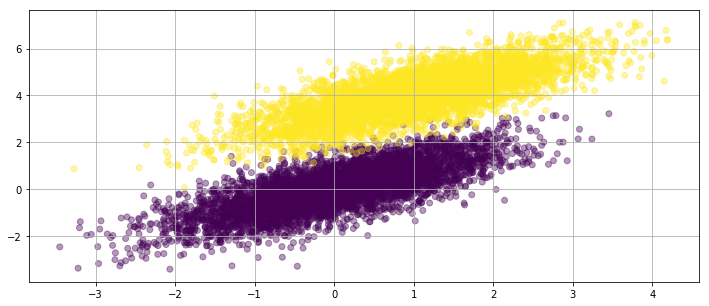

In [98]:
plt.figure(figsize=(12,5))
plt.grid(True)
plt.scatter(simulated_separable_features[:, 0], simulated_separable_features[:, 1], c = simulated_labels, alpha = 0.4)
plt.show()

In [99]:
def sigmoid(log_odds):
    return 1 / (1 + np.exp(-log_odds))

In [85]:
sigmoid(1000000)

1.0

# \begin{equation*} Log Loss = - \sum y_i log(p_i) + (1-y_i) log(1 - p_i)\end{equation*}

In [100]:
def log_likelihood(features, target, weights):
    log_odds = np.dot(features, weights)
    pred_probs = sigmoid(log_odds)
    ll = -np.sum( target*np.log(pred_probs) + (1-target)*np.log(1-pred_probs))
    return ll

### The derivative(slope/gradient) for Loss function of Logistic Regression is a little simpler:
* ## \begin{equation*}  = x\times(predictions - actual)  \end{equation*}

In [101]:
def logistic_regression(features, target, num_steps, learning_rate, add_intercept = False):
    if add_intercept:
        intercept = np.ones((features.shape[0], 1))
        features = np.hstack((intercept, features))
        
    weights = np.zeros(features.shape[1])
    
    for step in range(num_steps):
        log_odds = np.dot(features, weights)
        pred_probs = sigmoid(log_odds)

        # Update weights with gradient
        output_error_signal = pred_probs - target 
        gradient = np.dot(features.T, output_error_signal)
        weights -= learning_rate * gradient
        
        # Print log-likelihood every so often
        if step % 10000 == 0:
            print(log_likelihood(features, target, weights))
        
    return weights

In [102]:
weights = logistic_regression(simulated_separable_features, simulated_labels,
                     num_steps = 100000, learning_rate = 5e-5, add_intercept=True)

4346.264778614084
148.7067191206128
142.96493214708326
141.5452988008616
141.06031529721264
140.87031144972843
140.79025469354005
140.7550455755175
140.73914057761144
140.73183053123435


In [103]:
weights

array([-14.01785679,  -5.03280482,   8.24664701])

In [104]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C = 10**15)
clf.fit(simulated_separable_features, simulated_labels)

print('Sklearn coeffs: ', clf.intercept_, clf.coef_)
print('Our GrD coeffs: ', weights)

Sklearn coeffs:  [-13.99400825] [[-5.02712589  8.23286817]]
Our GrD coeffs:  [-14.01785679  -5.03280482   8.24664701]


C:\Users\Apoorv\Anaconda3\envs\trade\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [105]:
data_with_intercept = np.hstack((np.ones((simulated_separable_features.shape[0], 1)), simulated_separable_features))
final_scores = np.dot(data_with_intercept, weights)
preds = np.round(sigmoid(final_scores))

print('Accuracy from Our GrD: {0}'.format((preds == simulated_labels).sum() / len(preds)))
print('Accuracy from Sklearn: {0}'.format(clf.score(simulated_separable_features, simulated_labels)))

Accuracy from Our GrD: 0.9948
Accuracy from Sklearn: 0.9948


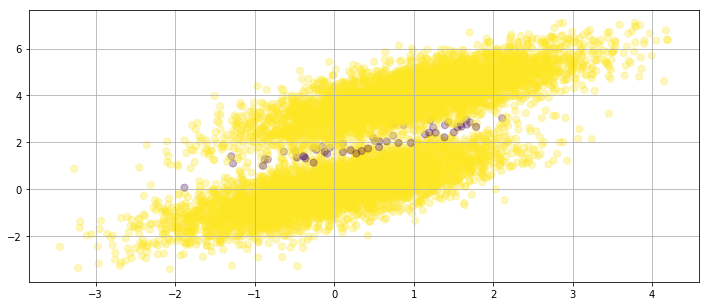

In [106]:
plt.figure(figsize=(12,5))
plt.grid(True)
plt.scatter(simulated_separable_features[:, 0], simulated_separable_features[:, 1],
            c = preds == simulated_labels, alpha = .3, s = 50)
plt.show()